# Data Exploration

TODO:
 - add information about normalized features
 - add more insights about the data, more context and relationships between the features
 - add more explaination 
 - correct spelling and grammer

## Setup

### Importing idstools package.

In [1]:
from idstools import _config, _idstools_data, data_explorer, data_preparation

### Loading the configuration file for Task 1.
In the following cell `configuration_data_task1` and `configuration_preparation_pipeline_task1` are assigned from the configuration for later use.

In [2]:
configuration = _config.load_config(config_file="../config/idstools/BikeRentalDaily_config.yml")
configuration_data_task1 = configuration.task1._idstools_data.TargetData
configuration_preparation_pipeline_task1 = configuration.task1.data_preparation.DataPreparation.pipeline

Now the `data_task1`, `explorer` and `preparator` objects are initialized.

For detailed information about the execution you can see `results/idstools.log` and `results/analysis_results.log`.

In [3]:
data_task1 = _idstools_data.TargetData(**configuration_data_task1)
explorer = data_explorer.DataExplorer(data_task1)
preparator = data_preparation.DataPreparation(data_task1)

2024-02-06 01:34:07,612 [_idstools_data] [INFO] - Initializing TargetData object.
2024-02-06 01:34:07,612 [_helpers] [INFO] - Reading data from:
/home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv
2024-02-06 01:34:07,616 [_idstools_data] [INFO] - Using label: cnt
2024-02-06 01:34:07,617 [_idstools_data] [INFO] - Using index: instant
2024-02-06 01:34:07,617 [_idstools_data] [INFO] - Output path not provided.
Using default output path: /home/davidrmn/Studies/introduction-data-science/results
2024-02-06 01:34:07,618 [_idstools_data] [INFO] - No environment name provided.
Using default environment name: SELF_EXECUTED
2024-02-06 01:34:07,618 [data_explorer] [INFO] - Initializing DataExplorer
2024-02-06 01:34:07,619 [data_explorer] [INFO] - Data loaded from /home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv
2024-02-06 01:34:07,619 [data_explorer] [INFO] - Please provide a pipeline configuration.
2024-02-06 01:34:07,619 [data_preparatio

## EDA

### Descriptive Analysis

Please note that you can also access the DataFrame also directly by explorer.data. 

e.g. `explorer.data.head().T`

#### Overview:

Now a simple descriptive analysis is applied to the data.

In [4]:
explorer.descriptive_analysis()
explorer.analysis_results.keys()

dict_keys(['head', 'info', 'dtypes', 'describe', 'isnull'])

With `head` we can have a sneak peak of all the columns of the data.

What we already see is that some variables are `integers` others are `floating numbers` and dteday seems to be a `datetime`.

We can already see some interesting values, e.g. `-1` for `weekday` should get our attention later. 

In [5]:
explorer.head

instant,154,685,368,472,442
dteday,03.06.2011,15.11.2012,03.01.2012,16.04.2012,17.03.2012
season,2.0,4.0,1.0,2.0,1.0
yr,0,1,1,1,1
mnth,6,11,1,4,3
holiday,0,0,0,1,0
weekday,5,4,2,1,-1
workingday,1,1,1,0,0
weathersit,1,2,1,1,2
temp,24.8,12.87,6.0,26.57,20.57
atemp,0.59,0.32,0.13,0.61,0.51


With the `dtypes` view we can proof our observation.

In [6]:
explorer.dtypes

dteday              object
season             float64
yr                   int64
mnth                 int64
holiday              int64
weekday              int64
workingday           int64
weathersit           int64
temp               float64
atemp              float64
hum                float64
windspeed          float64
leaflets             int64
price reduction      int64
casual               int64
registered           int64
cnt                  int64
dtype: object

#### Missing Values

Another view could be `info` where we can also see if there `null values` (missing values).

We should handle `season` and `hum` before we can train our model.

In [7]:
print(explorer.info)

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 154 to 497
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dteday           600 non-null    object 
 1   season           538 non-null    float64
 2   yr               600 non-null    int64  
 3   mnth             600 non-null    int64  
 4   holiday          600 non-null    int64  
 5   weekday          600 non-null    int64  
 6   workingday       600 non-null    int64  
 7   weathersit       600 non-null    int64  
 8   temp             600 non-null    float64
 9   atemp            600 non-null    float64
 10  hum              566 non-null    float64
 11  windspeed        600 non-null    float64
 12  leaflets         600 non-null    int64  
 13  price reduction  600 non-null    int64  
 14  casual           600 non-null    int64  
 15  registered       600 non-null    int64  
 16  cnt              600 non-null    int64  
dtypes: float64(5), int6

Another view to analyse the data for missing values is the `isnull` overview where the sum() function is applied on the isnull function.

In [8]:
explorer.isnull

dteday              0
season             62
yr                  0
mnth                0
holiday             0
weekday             0
workingday          0
weathersit          0
temp                0
atemp               0
hum                34
windspeed           0
leaflets            0
price reduction     0
casual              0
registered          0
cnt                 0
dtype: int64

#### Visualization of Missing Values

Additionally we can visualize the missing values either with `bar` or `matrix` method from the `missingno` library.

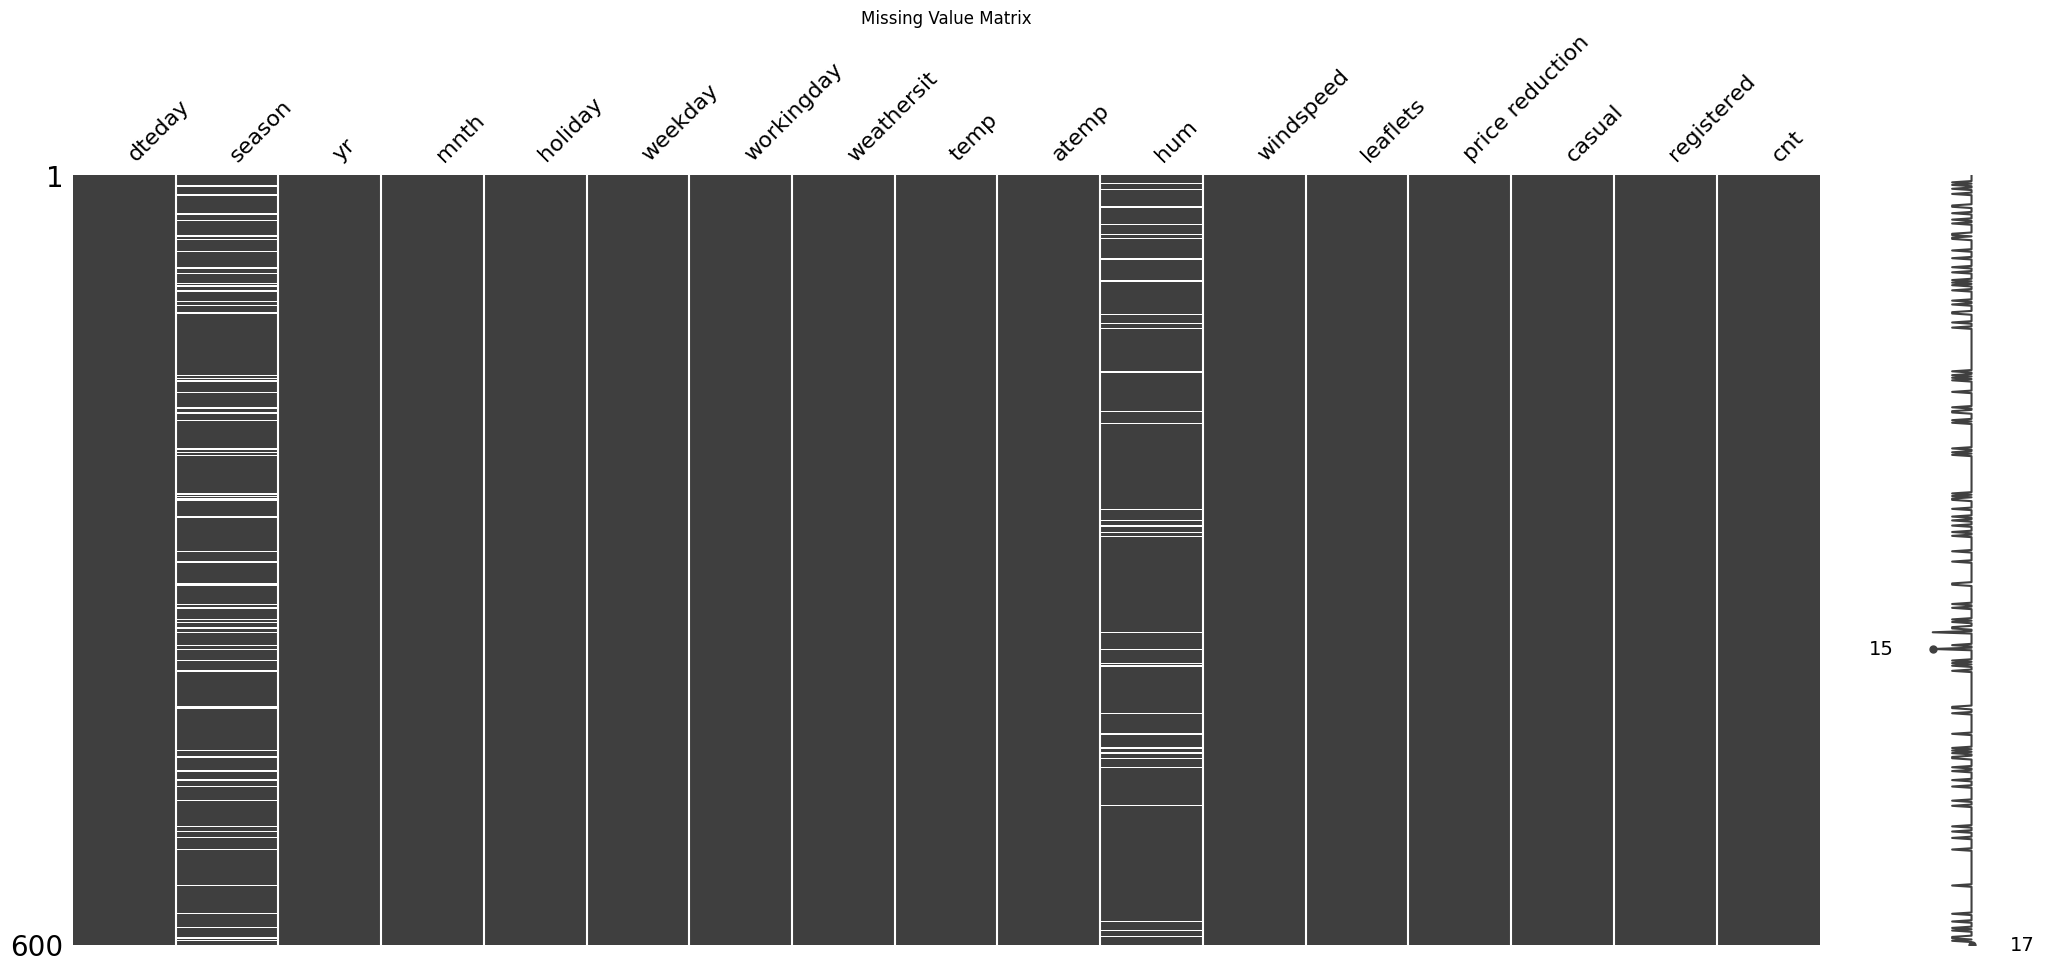

In [9]:
explorer.missing_value_analysis()

Each visualization will be accessable within the `data_exploration` object we created. These plots will also be saved to the `results` directory.

In [10]:
explorer.figures.keys()

dict_keys(['missing_value_bar', 'missing_value_matrix'])

Here we can see the figures that are available for visualization. Let's have a look at the `missing_value_bar` as well.

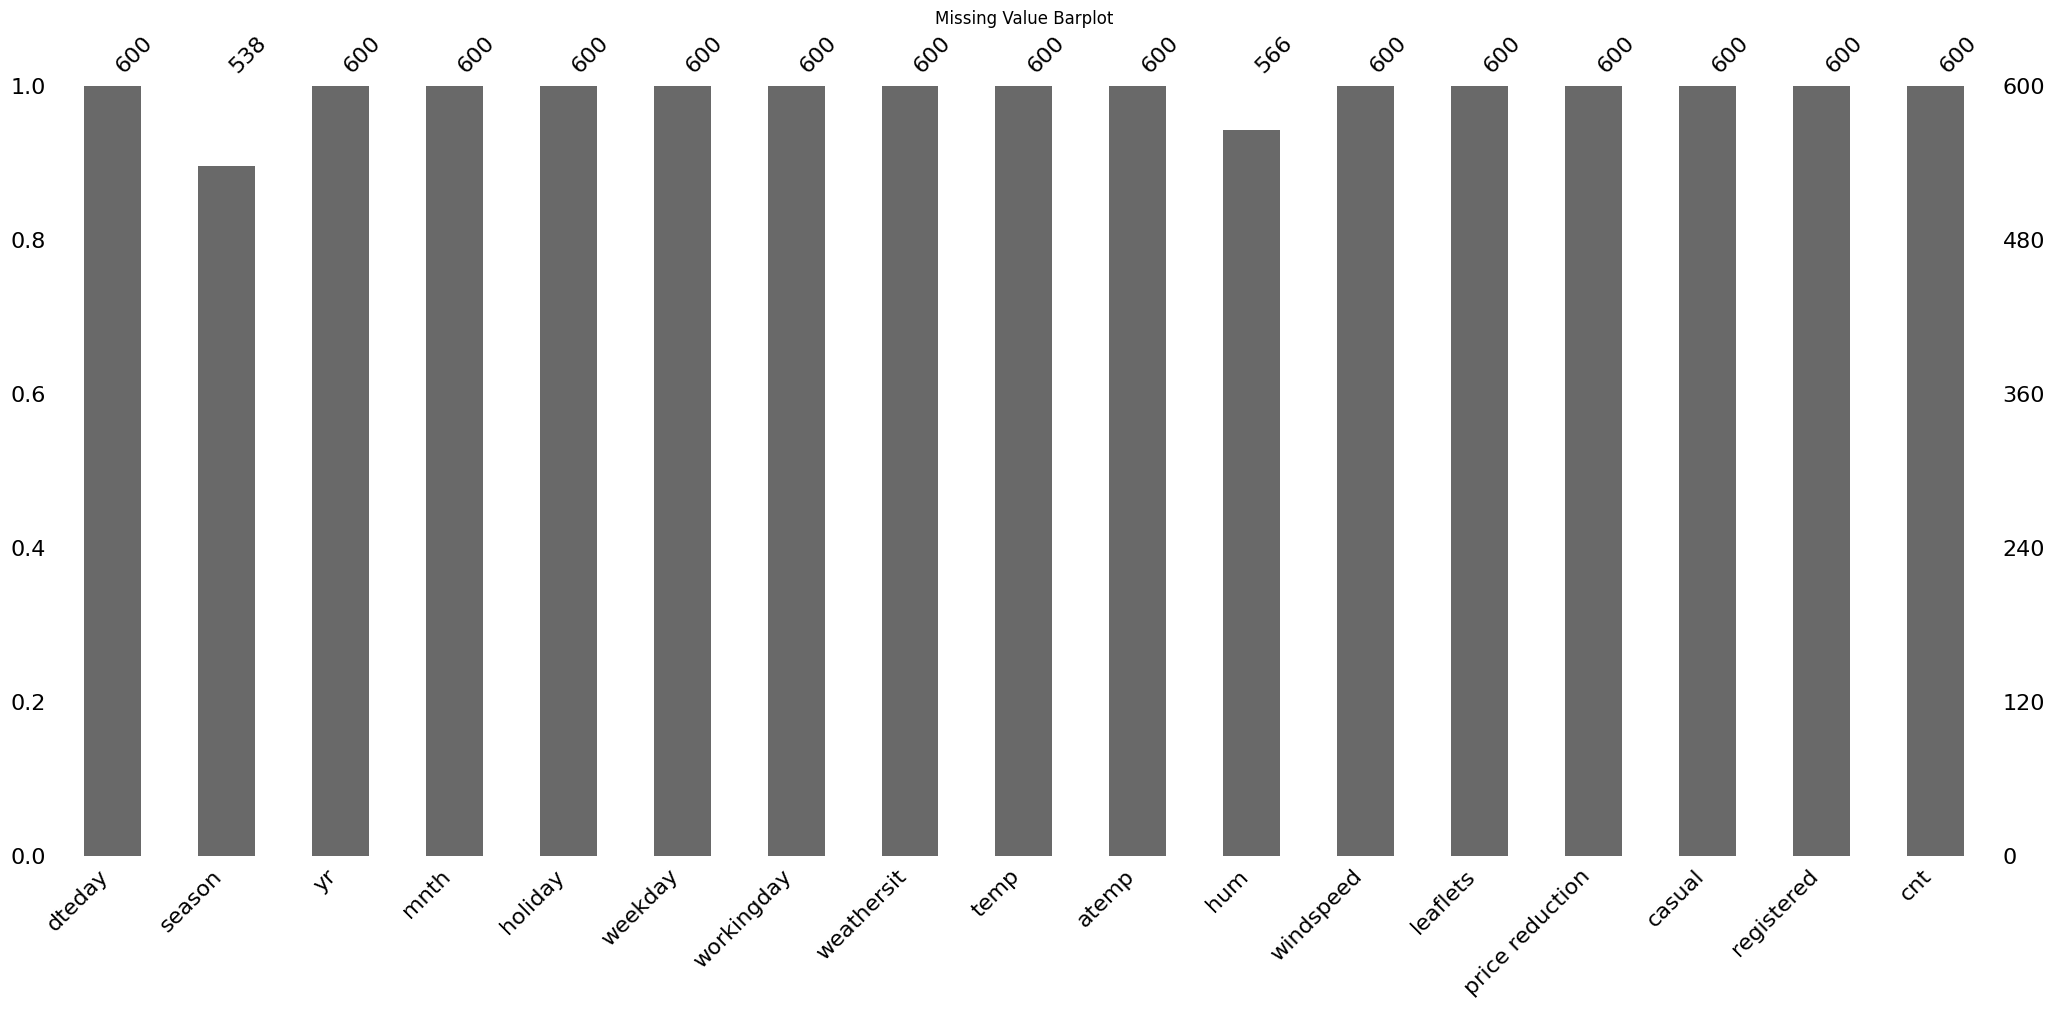

In [11]:
explorer.figures["missing_value_bar"]

#### Outliers

The `describe` view is also very useful, here we can get a rough overview how the values of the variables are distribute and where potential outlier exist.

We should keep `casual` and `cnt` in mind as the max values seem quiet high.

In [12]:
explorer.describe

,count,mean,std,min,25%,50%,75%,max
season,538.0,2.44,1.11,1.00,1.00,2.00,3.00,4.00
yr,600.0,0.50,0.50,0.00,0.00,0.00,1.00,1.00
mnth,600.0,6.47,3.44,1.00,4.00,6.00,9.00,12.00
holiday,600.0,0.03,0.17,0.00,0.00,0.00,0.00,1.00
weekday,600.0,2.93,2.08,-1.00,1.00,3.00,5.00,6.00
workingday,600.0,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weathersit,600.0,1.40,0.54,1.00,1.00,1.00,2.00,3.00
temp,600.0,19.81,7.21,2.37,13.57,20.10,26.06,34.47
atemp,600.0,0.47,0.16,0.08,0.34,0.49,0.61,0.83
hum,566.0,93.85,21.38,28.19,77.33,93.26,109.92,145.88


#### Visualization of Outliers

To visualize outliers we can use boxplots. 

In [13]:
explorer.outlier_analysis()

Outlier Barplots: 100%|██████████| 16/16 [00:00<00:00, 129804.38it/s]


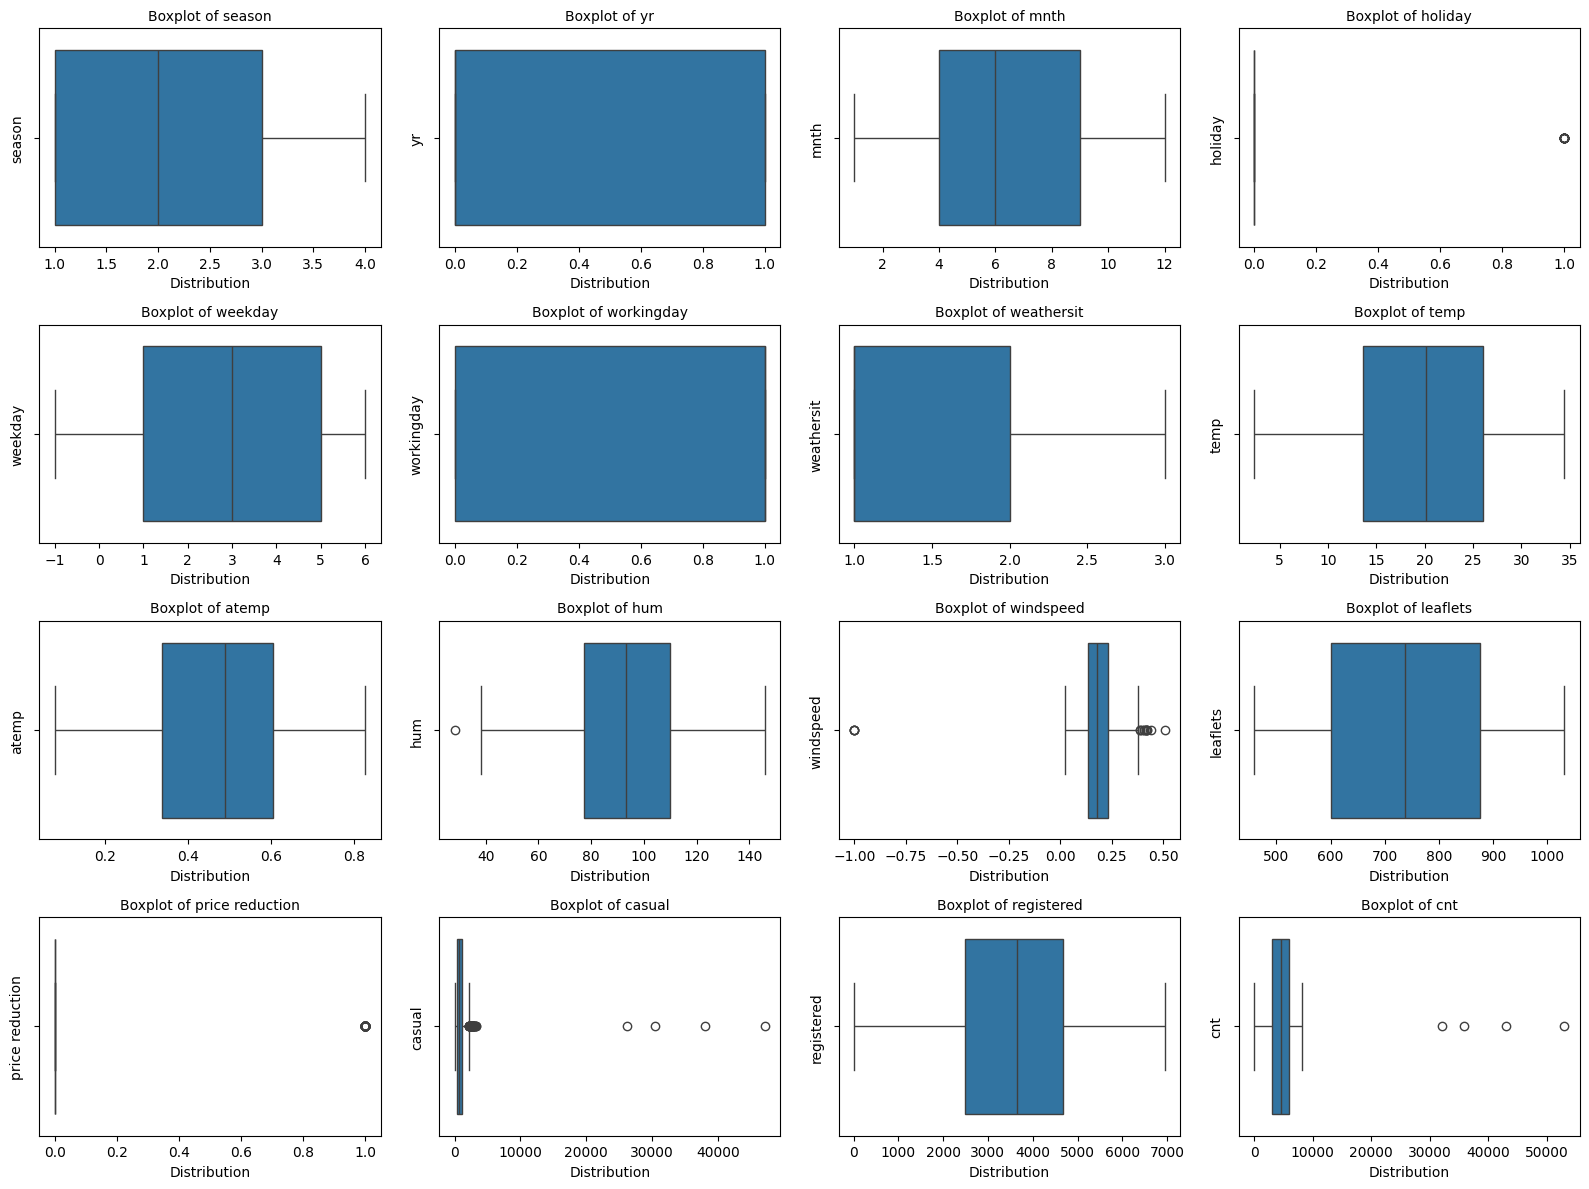

In [14]:
explorer.figures["outlier_boxplots"]

We can also use `histogram` plots to see the distribution of the variables in detail. We can see visually see if the distribution is skewed and agian see the outliers.

In [15]:
explorer.distribution_analysis()

Distribution Plots: 100%|██████████| 16/16 [00:00<00:00, 10824.01it/s]


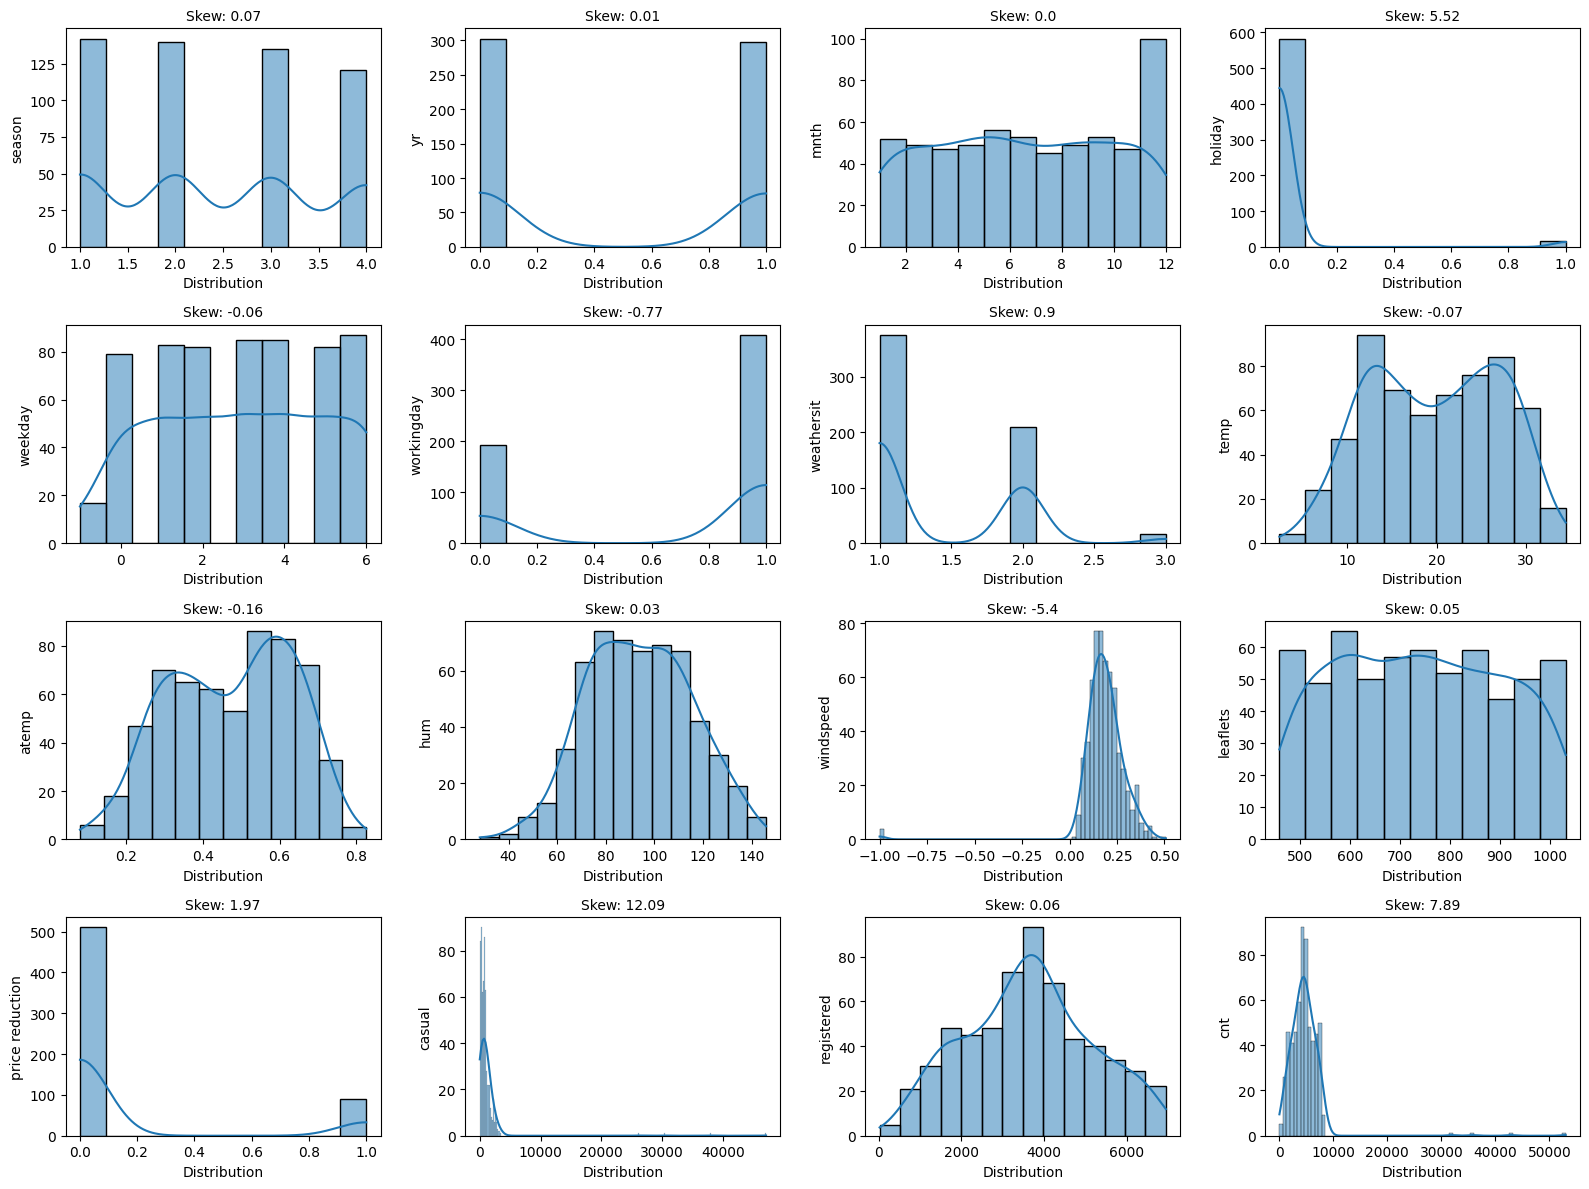

In [16]:
explorer.figures["distribution_plots"]

#### Correlation

Another part of the EDA is the correlation analysis.

First we can calculate the correlation between the `label` and the `features`.

In [17]:
explorer.calculate_correlation()

These are the correlation values of all features against our label. The method used is `pearson`.

In [18]:
explorer.correlation

cnt                1.00e+00
casual             9.07e-01
registered         5.81e-01
atemp              3.84e-01
temp               3.80e-01
yr                 3.58e-01
season             2.12e-01
weathersit         1.85e-01
mnth               1.40e-01
weekday            1.30e-01
windspeed          1.00e-01
hum                7.85e-02
holiday            4.80e-02
workingday         4.03e-02
leaflets           3.20e-02
price reduction    8.59e-03
Name: cnt, dtype: float64

In [19]:
explorer.strong_correlation

cnt           1.00
casual        0.91
registered    0.58
Name: cnt, dtype: float64

In [20]:
explorer.moderate_correlation

atemp         0.38
temp          0.38
yr            0.36
season        0.21
weathersit    0.18
mnth          0.14
weekday       0.13
windspeed     0.10
Name: cnt, dtype: float64

In [21]:
explorer.weak_correlation

hum                7.85e-02
holiday            4.80e-02
workingday         4.03e-02
leaflets           3.20e-02
price reduction    8.59e-03
Name: cnt, dtype: float64

As we already saw that our label `cnt` and the stronges feature `casual` have outliers we want to also use `spearman` as this method is less influenced by high outliers. 

In [22]:
explorer.calculate_correlation(method="spearman")

In [23]:
explorer.correlation

cnt                1.00
registered         0.94
casual             0.76
atemp              0.63
temp               0.63
yr                 0.56
season             0.40
weathersit         0.27
windspeed          0.26
mnth               0.25
hum                0.10
weekday            0.08
holiday            0.06
workingday         0.04
leaflets           0.03
price reduction    0.01
Name: cnt, dtype: float64

In [24]:
explorer.strong_correlation

cnt           1.00
registered    0.94
casual        0.76
atemp         0.63
temp          0.63
yr            0.56
Name: cnt, dtype: float64

In [25]:
explorer.moderate_correlation

season        0.40
weathersit    0.27
windspeed     0.26
mnth          0.25
Name: cnt, dtype: float64

In [26]:
explorer.weak_correlation

hum                0.10
weekday            0.08
holiday            0.06
workingday         0.04
leaflets           0.03
price reduction    0.01
Name: cnt, dtype: float64

This looks better, we can see more features that show strong correlation to our label `cnt`. Another thing we should keep in mind.

#### Correlation Visualization

Last but not least we can visualize the correlation matrix and scatter plots between all features and the label.

In [27]:
explorer.correlation_analysis()

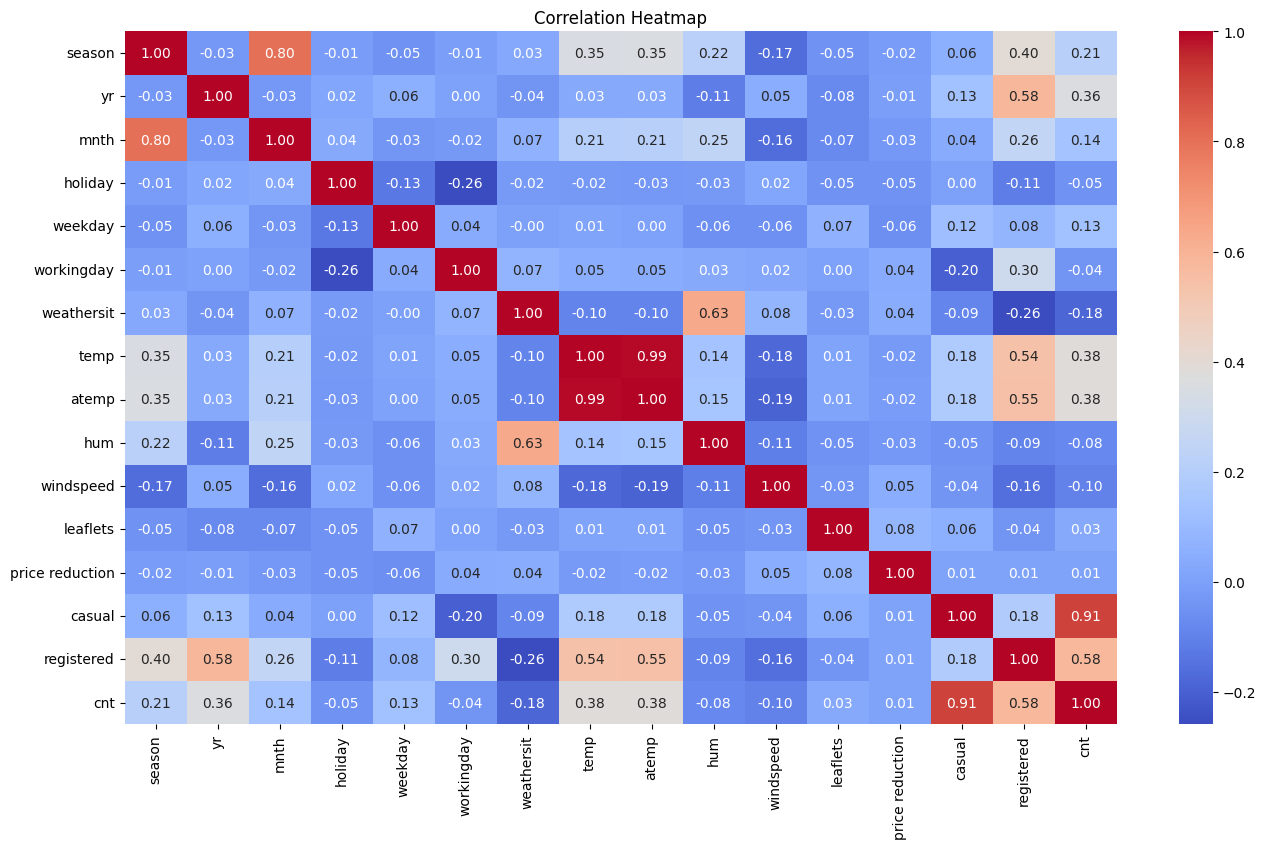

In [28]:
explorer.figures["correlation_heatmap"]

In [29]:
explorer.scatter_analysis()

Scatter Plots: 100%|██████████| 16/16 [00:00<00:00, 164080.35it/s]


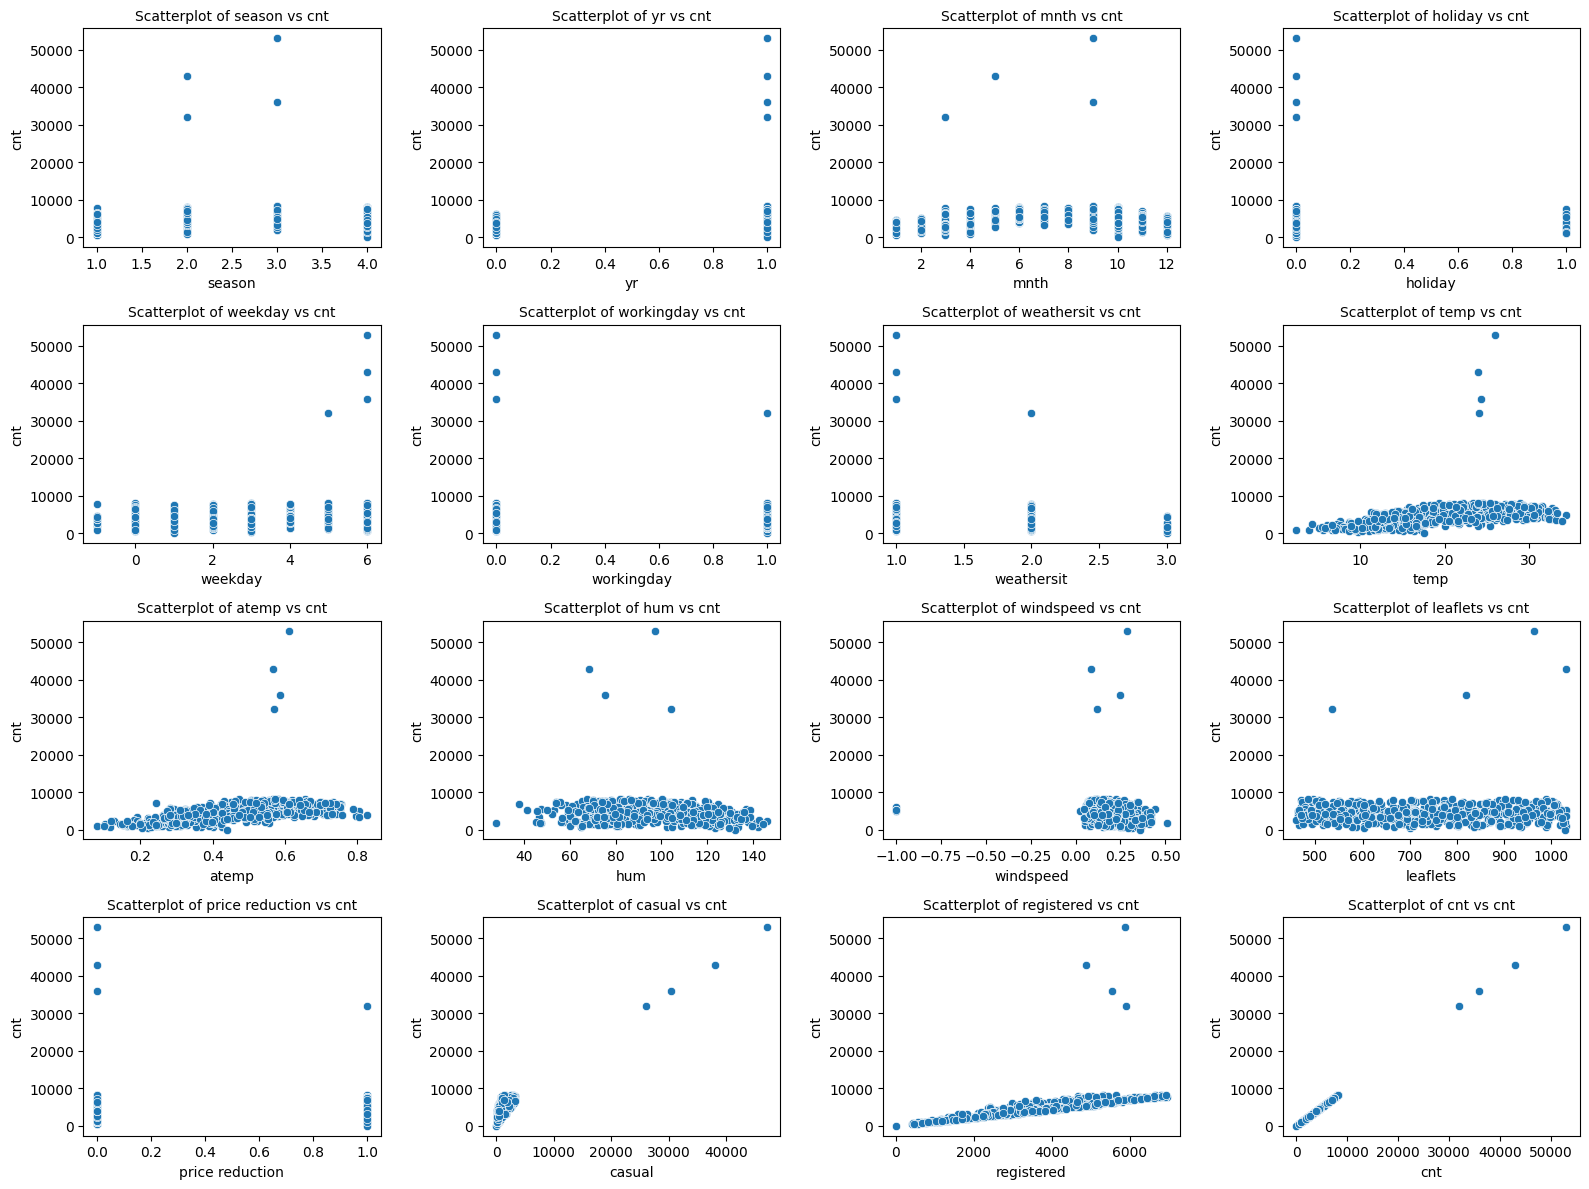

In [30]:
explorer.figures["scatter_plots"]

#### Next Steps

In the next step we want to get rid of the outliers and missing values as well as drop some unnecessary features.

Therefore we can use the data_preparation module of the idstools package, define our pipeline transformer and prepare the data for our model.